# BLACKBODY RADIATION

## Wien law and Planck distribution

https://en.wikipedia.org/wiki/Planck%27s_law

$\Large B_\nu(\nu, T) = \frac{ 2 h \nu^3}{c^2} \frac{1}{e^\frac{h\nu}{k_\mathrm B T} - 1}$

$\Large B_\lambda(\lambda, T) =\frac{2hc^2}{\lambda^5}\frac{1}{ e^{\frac{hc}{\lambda k_\mathrm B T}} - 1}$


https://en.wikipedia.org/wiki/Wien_approximation

https://commons.wikimedia.org/wiki/File:Mplwp_blackbody_nu_planck-wien-rj_5800K.svg

https://commons.wikimedia.org/wiki/User:Geek3/mplwp

hc/kB =  14387.7581152 micro_m.K
tempratures = [3000, 4000, 5000] K
lambda_max =  [0.9659243, 0.724443225, 0.57955458] micro m
nu_max =  [310.368481256761, 413.8246416756813, 517.2808020946017] THz


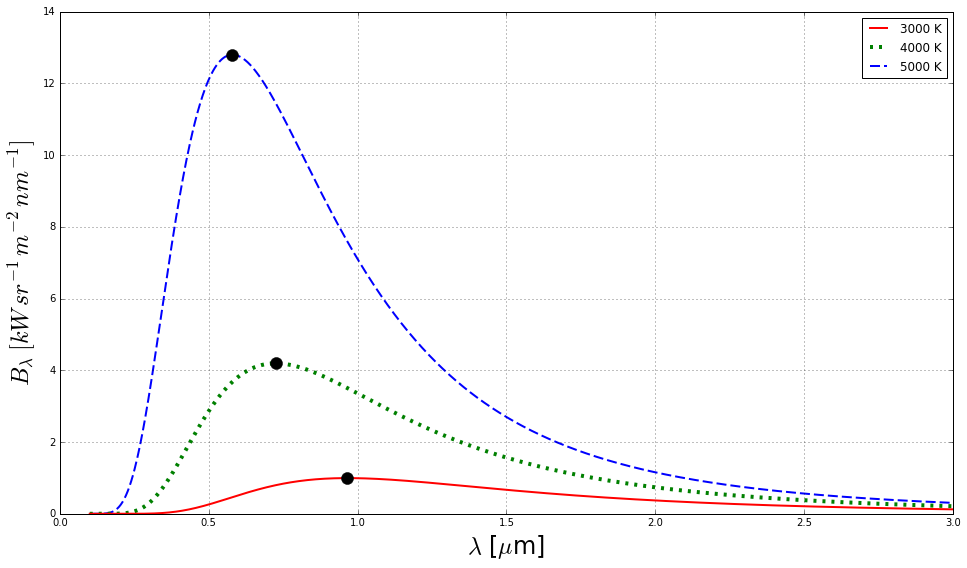

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from math import *


fig = plt.figure(figsize=(16,9))

b = 2.8977729e-3    # m K   Wien yasası sabiti
h = 6.626070040e-34 # J.s   Planck sabiti
c = 2.99792458e8    # m/s   Işık hızı
kB = 1.38065e-23    # J/K   Boltzman sabiti

b_mu_m = b*1e6   # micro m . K   Wien yasası sabiti
h_mu_m = h*1e6   # N . micro m . s
c_mu_m = c*1e6   # micro m / s
kB_mu_m = kB*1e6 # N . micro m / K

h_THz = h_mu_m * 1e12  # N micro_m THz^-1
c_THz = c_mu_m * 1e-12 # micro_m THz

hckB = h*c_mu_m/kB # mu_m K
print "hc/kB = ", hckB, "micro_m.K"


def planck_lu(lu, T):
    return 2*h_mu_m*c_mu_m**2/(lu**5*(exp(hckB/(lu*T))-1.0))

def planck_nu(nu0, T):
    nu = nu0*1e12 # THz
    return 2*1e9*h*nu**3/(c**2*(exp(h*nu/(kB*T))-1.0))


Temps = [3000, 4000, 5000]
lu_max = [b_mu_m/T for T in Temps]
nu_max = [c_mu_m/lu*1e-12 for lu in lu_max]

print "tempratures =", Temps, "K"
print "lambda_max = ", lu_max, "micro m"
print "nu_max = ", nu_max, "THz"

lu_mesh = np.linspace(.1, 3, 1001)
y_planck1 = [planck_lu(lu, Temps[0]) for lu in lu_mesh]
y_planck2 = [planck_lu(lu, Temps[1]) for lu in lu_mesh]
y_planck3 = [planck_lu(lu, Temps[2]) for lu in lu_mesh]

p01, = plt.plot(lu_max[0], planck_lu(lu_max[0], Temps[0]), "o", zorder=6, ms=12, color="black")
p02, = plt.plot(lu_max[1], planck_lu(lu_max[1], Temps[1]), "o", zorder=5, ms=12, color="black")
p03, = plt.plot(lu_max[2], planck_lu(lu_max[2], Temps[2]), "o", zorder=4, ms=12, color="black")

p1, = plt.plot(lu_mesh, y_planck1, '-', lw=2, color="red", label='%s K'%Temps[0], zorder=3)
p2, = plt.plot(lu_mesh, y_planck2, ':', lw=4, color="green", dashes=[3, 6], label='%s K'%Temps[1], zorder=2)
p3, = plt.plot(lu_mesh, y_planck3, '--', lw=2, color="blue", dashes=[10, 4], label='%s K'%Temps[2], zorder=1)

plt.xlabel(ur'$\lambda$ [$\mu$m]', fontsize=24)
plt.ylabel(ur'$B_{\lambda}\;[kW\,sr^{-1}\,m^{-2}\,nm^{-1}]$', fontsize=24)
plt.legend(loc="best")
plt.grid(zorder=0)
plt.show()

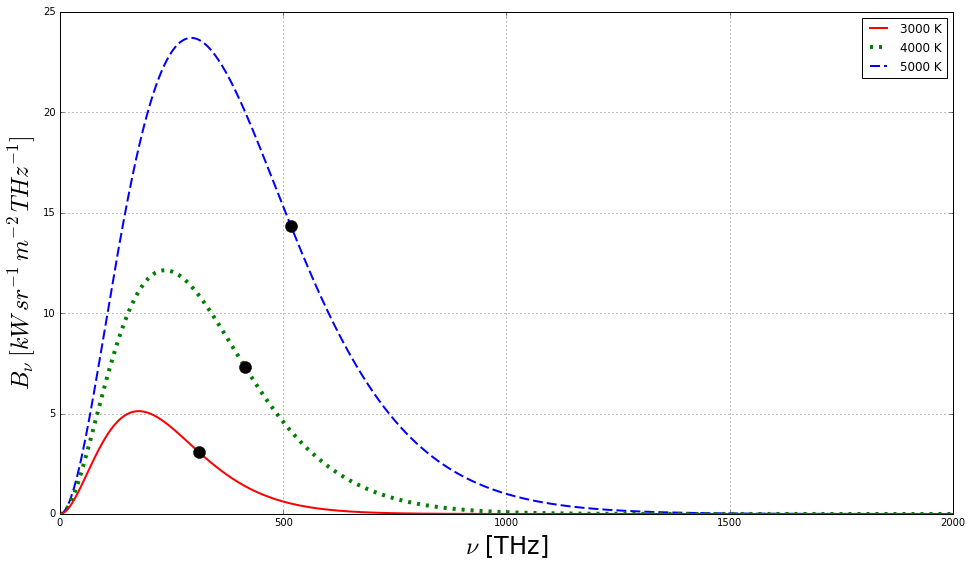

In [2]:
fig = plt.figure(figsize=(16,9))
nu_mesh = np.linspace(.1, 2000, 1001)

y_planck1 = [planck_nu(nu, Temps[0]) for nu in nu_mesh]
y_planck2 = [planck_nu(nu, Temps[1]) for nu in nu_mesh]
y_planck3 = [planck_nu(nu, Temps[2]) for nu in nu_mesh]

#plt.plot(nu_mesh, y_planck1, '-', lw=2, color="red", label='%s K'%Temps[0], zorder=3)


p01, = plt.plot(nu_max[0], planck_nu(nu_max[0], Temps[0]), "o", zorder=6, ms=12, color="black")
p02, = plt.plot(nu_max[1], planck_nu(nu_max[1], Temps[1]), "o", zorder=5, ms=12, color="black")
p03, = plt.plot(nu_max[2], planck_nu(nu_max[2], Temps[2]), "o", zorder=4, ms=12, color="black")

p1, = plt.plot(nu_mesh, y_planck1, '-', lw=2, color="red", label='%s K'%Temps[0], zorder=3)
p2, = plt.plot(nu_mesh, y_planck2, ':', lw=4, color="green", dashes=[3, 6], label='%s K'%Temps[1], zorder=2)
p3, = plt.plot(nu_mesh, y_planck3, '--', lw=2, color="blue", dashes=[10, 4], label='%s K'%Temps[2], zorder=1)

plt.xlabel(ur'$\nu$ [THz]', fontsize=24)
plt.ylabel(ur'$B_{\nu}\;[kW\,sr^{-1}\,m^{-2}\,THz^{-1}]$', fontsize=24)
plt.legend(loc="best")
plt.grid(zorder=0)
plt.show()

$\large 1\times 10^{-9} \;W\,sr^{-1}\,m^{-2}\,Hz^{-1} = 1 \;kW\,sr^{-1}\,m^{-2}\,THz^{-1}$